In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import numpy as np
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sb

In [73]:
train = pd.read_csv("/content/drive/MyDrive/CRUX 2023 ML WORKSHOP CSV/crux-ml-ws-2023-contest-1/train.csv")
test= pd.read_csv("/content/drive/MyDrive/CRUX 2023 ML WORKSHOP CSV/crux-ml-ws-2023-contest-1/test.csv")

In [74]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34189 entries, 0 to 34188
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              34189 non-null  int64 
 1   age             34189 non-null  int64 
 2   workclass       34189 non-null  object
 3   fnlwgt          34189 non-null  int64 
 4   education       34189 non-null  object
 5   education-num   34189 non-null  int64 
 6   marital-status  34189 non-null  object
 7   occupation      34189 non-null  object
 8   relationship    34189 non-null  object
 9   race            34189 non-null  object
 10  sex             34189 non-null  object
 11  capital-gain    34189 non-null  int64 
 12  capital-loss    34189 non-null  int64 
 13  hours-per-week  34189 non-null  int64 
 14  native-country  34189 non-null  object
 15  income          34189 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.2+ MB


In [76]:
train.head(5)

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,23122,37,Local-gov,217689,Some-college,10,Married-civ-spouse,Other-service,Husband,Amer-Indian-Eskimo,Male,0,0,32,United-States,<=50k
1,30555,30,Self-emp-not-inc,182089,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,85,United-States,<=50k
2,8937,33,Private,111985,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,58,United-States,<=50k
3,34392,41,Self-emp-inc,244172,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,?,>50k
4,42173,59,Private,165695,Assoc-acdm,12,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,32,United-States,>50k


In [77]:
#Income binary catagorization
def reincome(row):
  if row['income']=='<=50k':
    row['income']=0
  else:
    row['income']=1

  return row
train = train.apply(reincome,axis ='columns')


##Analysis of features for preprocessing
The Features consists of the columns that are :
1. Numeric Data: as in Age, Work hours etc that need to be catagorized into classes
2. Catagorical Data : as in Sex, Native country etc which are already classified. Further classification is needed if there are too little instances of a particular type.

In [78]:
num =train[['age', 'fnlwgt', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']]
cat = train[['workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country',]]


Analysis of correlation between catagorical features and target variable to get an idea on further classification of the same

In [79]:
for i in cat:
  print(pd.pivot_table(train,index = 'income',columns=i,aggfunc='count'))

              age                                                 \
workclass       ?  Federal-gov  Local-gov  Never-worked  Private   
income                                                             
0          1755.0        610.0     1538.0           9.0  18640.0   
1           182.0        383.0      626.0           NaN   5170.0   

                                                                   \
workclass  Self-emp-inc  Self-emp-not-inc  State-gov  Without-pay   
income                                                              
0                 506.0            1967.0     1001.0         13.0   
1                 661.0             744.0      382.0          2.0   

          capital-gain  ... relationship     sex                          \
workclass            ?  ...  Without-pay       ?  Federal-gov  Local-gov   
income                  ...                                                
0               1755.0  ...         13.0  1755.0        610.0     1538.0   
1        

In [80]:
for i in cat.columns:
  print(i.upper(),train[i].value_counts(),sep='\n',end='\n\n\n')

WORKCLASS
 Private             23810
 Self-emp-not-inc     2711
 Local-gov            2164
 ?                    1937
 State-gov            1383
 Self-emp-inc         1167
 Federal-gov           993
 Without-pay            15
 Never-worked            9
Name: workclass, dtype: int64


EDUCATION
 HS-grad         11095
 Some-college     7697
 Bachelors        5505
 Masters          1858
 Assoc-voc        1429
 11th             1269
 Assoc-acdm       1119
 10th              969
 7th-8th           676
 Prof-school       603
 9th               527
 12th              445
 Doctorate         415
 5th-6th           357
 1st-4th           167
 Preschool          58
Name: education, dtype: int64


MARITAL-STATUS
 Married-civ-spouse       15710
 Never-married            11219
 Divorced                  4642
 Separated                 1095
 Widowed                   1063
 Married-spouse-absent      433
 Married-AF-spouse           27
Name: marital-status, dtype: int64


OCCUPATION
 Prof-specialty   

Analysis of numerical features :


*   Hours per week shows normal distribution about mean
*   Capital gains and Losses are left justified.
*   Population gradient across Age catagories is bottom heavy






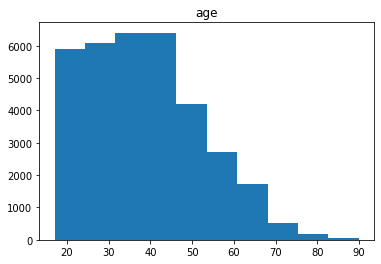

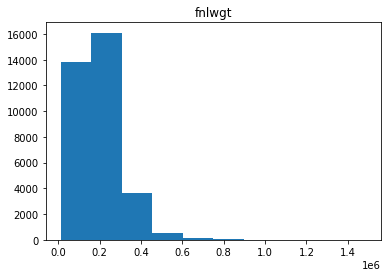

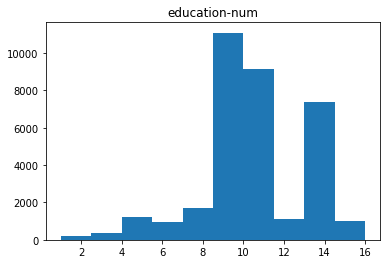

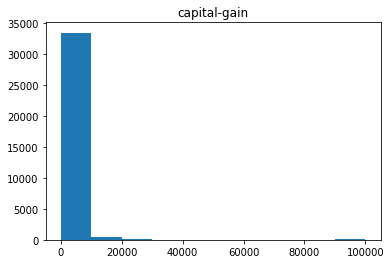

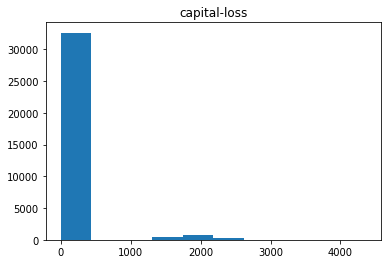

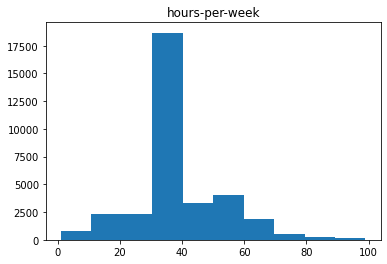

In [81]:
for n in num.columns:
  plt.hist(num[n])
  plt.title(n)
  plt.show()

Checking if there is a requirement to eliminate any train instances that have features that are not in test data to avoid errors during scaling.

In [82]:
for i in cat:
  if not train[i].unique().sort()==test[i].unique().sort():
    print(i)
  
 

In [83]:
for i in num.columns:
  print(i.upper(),'Diff-min : ',train[i].min()-test[i].min(),'Diff-max:',train[i].max()-test[i].max(),sep='\n' ,end='\n\n\n')

AGE
Diff-min : 
0
Diff-max:
0


FNLWGT
Diff-min : 
-1207
Diff-max:
-5695


EDUCATION-NUM
Diff-min : 
0
Diff-max:
0


CAPITAL-GAIN
Diff-min : 
0
Diff-max:
0


CAPITAL-LOSS
Diff-min : 
0
Diff-max:
0


HOURS-PER-WEEK
Diff-min : 
0
Diff-max:
0




## Preprocessing Features in the dataset

Classification of native-countries into regions. 

*   From the correlation between native countries and income brackets, countries from same geographic region seem to suggest similar distribution of people between the two brackets in terms of percentage.


P.S. Classifying and formatting the list of countries into regions was done by the lord and master ChatGPT :)




In [84]:
train['native-country'].unique()

array([' United-States', ' ?', ' Haiti', ' Mexico', ' Germany',
       ' El-Salvador', ' Puerto-Rico', ' Japan', ' Iran', ' Cuba',
       ' Nicaragua', ' Dominican-Republic', ' Philippines', ' Hungary',
       ' South', ' Jamaica', ' Poland', ' Trinadad&Tobago', ' Guatemala',
       ' England', ' Taiwan', ' India', ' Cambodia', ' Hong', ' Laos',
       ' China', ' Outlying-US(Guam-USVI-etc)', ' Columbia', ' France',
       ' Scotland', ' Canada', ' Portugal', ' Italy', ' Honduras',
       ' Vietnam', ' Ecuador', ' Yugoslavia', ' Greece', ' Thailand',
       ' Peru', ' Ireland', ' Holand-Netherlands'], dtype=object)

In [85]:
#Native country mappint to native-regions
Asia = [' Japan', ' Iran', ' Philippines', ' Hong', ' Taiwan', ' Cambodia', ' China', ' Laos', ' India', ' Vietnam', ' Thailand']
Europe =[' Germany', ' Hungary', ' Poland', ' England', ' France', ' Scotland', ' Portugal', ' Italy', ' Yugoslavia', ' Greece', ' Ireland', ' Holand-Netherlands']
North_America = [' United-States', ' Canada', ' Outlying-US(Guam-USVI-etc)']
Latin = [' Haiti', ' Mexico', ' El-Salvador', ' Cuba', ' Nicaragua', ' Dominican-Republic', ' Guatemala', ' Trinadad&Tobago', ' Jamaica', ' Honduras', ' Ecuador', ' Peru',' Puerto-Rico']
def renat(row):
  if row['native-country'] in Asia:
    row['Native']='Asia'
  elif row['native-country'] in Europe:
    row['Native']='Europe'
  elif row['native-country'] in North_America:
    row['Native']='North America'
  elif row['native-country'] in Latin:
    row['Native']='Latin America'
  else :
    row['Native']= 'Other'
  return row
train = train.apply(renat,axis ='columns')
test = test.apply(renat,axis ='columns')

In [86]:
train.Native.value_counts()

North America    30820
Latin America     1386
Other              727
Asia               693
Europe             563
Name: Native, dtype: int64

In classification of education types, no significant change in accuracy (increase of 0.1%) was seen pre and post classification. 

In [87]:
train.education.unique()

array([' Some-college', ' HS-grad', ' Assoc-acdm', ' 11th', ' Bachelors',
       ' Prof-school', ' 1st-4th', ' 7th-8th', ' 12th', ' Assoc-voc',
       ' Masters', ' 9th', ' 5th-6th', ' 10th', ' Preschool',
       ' Doctorate'], dtype=object)

In [88]:
#Education Level Catagorization
E = [' 1st-4th', ' 7th-8th' ,' 5th-6th', ' Preschool',  ]
H =[' 11th', ' 12th',' 10th',' 9th',' HS-grad']
G =[' Some-college',' Bachelors',' Masters',' Doctorate']
P =[ ' Assoc-acdm',' Prof-school',' Assoc-voc' ]

def reEd(row):
  if row['education'] in E:
    row['education']='Elementary'
  elif row['education'] in H:
    row['education']='High-School'
  elif row['education'] in G:
    row['education']='Graduate'
  else:
    row['education']='Spec'
  
  return row
train = train.apply(reEd,axis ='columns')
test = test.apply(reEd,axis ='columns')

<AxesSubplot:>

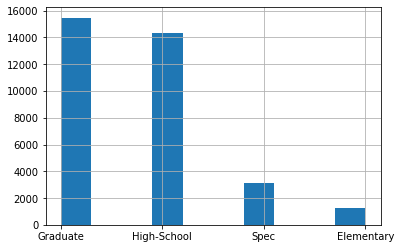

In [89]:
train.education.hist()

Catagorization of occupation into Service, Defence , Civil and Auxilary sectors was done to avoid overfitting. However showed no significant change in accuracy in predicting on the in-contest test data


In [90]:
train.occupation.unique()

array([' Other-service', ' Farming-fishing', ' Craft-repair',
       ' Transport-moving', ' Adm-clerical', ' Prof-specialty',
       ' Exec-managerial', ' ?', ' Tech-support', ' Sales',
       ' Handlers-cleaners', ' Protective-serv', ' Machine-op-inspct',
       ' Priv-house-serv', ' Armed-Forces'], dtype=object)

In [91]:
def reocc(row):
  if(row['occupation'] in [' Other-service', ' Farming-fishing',' Tech-support', ' Craft-repair',' Transport-moving',' Handlers-cleaners',' Priv-house-serv',' Machine-op-inspct']):
    row['occupation']='Service'
  elif (row['occupation'] in [' Armed-Forces', ' Protective-serv']):
    row['occupation']='Def'
  elif (row['occupation'] in [' Adm-clerical', ' Prof-specialty',' Exec-managerial']):
    row['occupation']='Civil'
  else :
    row['occupation']='Other'
  return row
train = train.apply(reocc,axis ='columns')
test = test.apply(reocc,axis ='columns')

<AxesSubplot:>

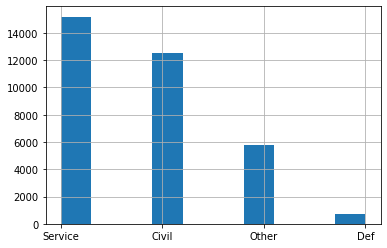

In [92]:
train.occupation.hist()

In [93]:
for i in num.columns:
  print(i.upper(),train[i].describe(),sep='\n' ,end='\n\n\n')

AGE
count    34189.000000
mean        38.609962
std         13.660837
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


FNLWGT
count    3.418900e+04
mean     1.895446e+05
std      1.047680e+05
min      1.228500e+04
25%      1.175420e+05
50%      1.783220e+05
75%      2.375250e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


EDUCATION-NUM
count    34189.000000
mean        10.070286
std          2.566616
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64


CAPITAL-GAIN
count    34189.000000
mean      1106.028167
std       7646.887377
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


CAPITAL-LOSS
count    34189.000000
mean        87.820030
std        403.501064
min          0.000000
25%          0.000000
5

In [94]:
for i in num.columns:
  print(i.upper(),test[i].describe(),sep='\n' ,end='\n\n\n')

AGE
count    14653.000000
mean        38.722036
std         13.825866
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


FNLWGT
count    1.465300e+04
mean     1.899431e+05
std      1.075325e+05
min      1.349200e+04
25%      1.175830e+05
50%      1.778310e+05
75%      2.378730e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64


EDUCATION-NUM
count    14653.000000
mean        10.096294
std          2.581105
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education-num, dtype: float64


CAPITAL-GAIN
count    14653.000000
mean      1016.162151
std       6976.056298
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


CAPITAL-LOSS
count    14653.000000
mean        86.761005
std        401.856455
min          0.000000
25%          0.000000
5

Analysis of the numerical features :


*  Age distribution could be classified into multiple sections considering the basic correlation between age groups and income
*  Working hours can be classified into classes with respect to their normal distribution across mean
*  It makes sense to analyse capital loss and gain as a whole instead of two independent variables in terms of their difference. This avoids having too many variables in the classification algorithm

In [95]:
#Age catagorization
def reage(row):
  for i in range(17,47,5):
    if int(row['age']) in range(i,i+5):
      row['age']=int((i-17)/5)
  for i in range(47,63,8):
    if int(row['age']) in range(i,i+8):
      row['age']=int((i-47)/8)+6
  for i in range(63,91,9):
    if int(row['age']) in range(i,i+9):
      row['age']=int((i-63)/9)+8
  return row
train = train.apply(reage,axis ='columns')
test = test.apply(reage,axis ='columns')

In [96]:
train.age.value_counts()

3     4638
6     4629
2     4434
4     4285
1     4243
5     3878
0     3311
7     2860
8     1416
9      398
10      64
11      33
Name: age, dtype: int64

The below scatter plot suggest no logic in classifying education numbers into catagories cosidering that all education numbers seem to have apploximately equal distribution across both catagories

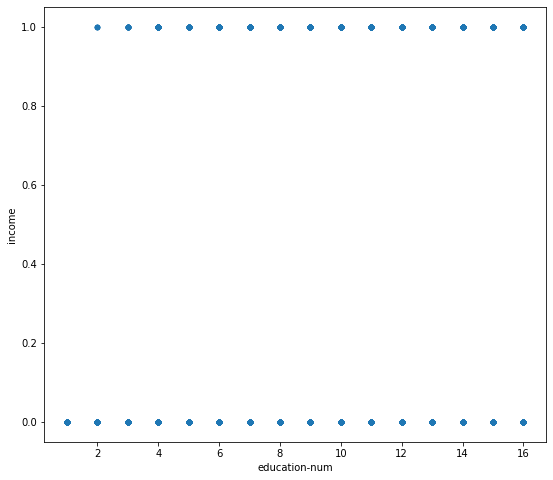

In [97]:
train.plot(x="education-num", y='income' ,kind=  'scatter', figsize=(9, 8))
plt.show()

In [98]:
#Working Hours catagorization
def rehour(row):
  for i in range(1,30,15):
    if int(row['hours-per-week']) in range(i,i+15):
      row['hours-per-week']=int((i-1)/15)
  for i in range(30,45,3):
    if int(row['hours-per-week']) in range(i,i+3):
      row['hours-per-week']=int((i-30)/3)+2
  for i in range(45,55,5):
    if int(row['hours-per-week']) in range(i,i+5):
      row['hours-per-week']=int((i-45)/5)+7
  for i in range(55,99,15):
    if int(row['hours-per-week']) in range(i,i+15):
      row['hours-per-week']=int((i-55)/15)+9
  return row
train = train.apply(rehour,axis ='columns')
test = test.apply(rehour,axis ='columns')


<AxesSubplot:>

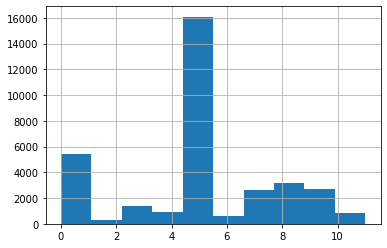

In [99]:
train['hours-per-week'].hist()

In [100]:
#Merging Capital loss and gains as capital net=gain-loss

def capnet(row):
  row['Capital-net']=row['capital-gain']-row['capital-loss'] 
  return row
train = train.apply(capnet,axis ='columns')
test = test.apply(capnet,axis ='columns')

In [101]:
train['Capital-net'].describe()

count    34189.000000
mean      1018.208137
std       7670.200011
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital-net, dtype: float64

<AxesSubplot:>

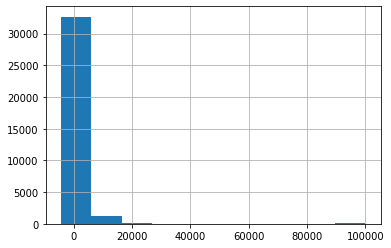

In [102]:
train['Capital-net'].hist()

In [103]:
#Catagorizing the new 'Capital-Net' feature into different ranges to 
def reCap(row):
  for i in range(-4500,4500,250):
    if int(row['Capital-net'])in range(i,i+250):
      row['Capital-net'] = int((i+4500)/250)
  for i in range(4500,20000,2000):
    if int(row['Capital-net'])in range(i,i+2000):
      row['Capital-net'] = int((i-4500)/2000)+36
  for i in range(20000,100000,20000):
    if int(row['Capital-net'])in range(i,i+20000):
      row['Capital-net'] = int((i-20000)/20000)+44
  return row
train = train.apply(reCap,axis ='columns')
test = test.apply(reCap,axis ='columns')

<AxesSubplot:>

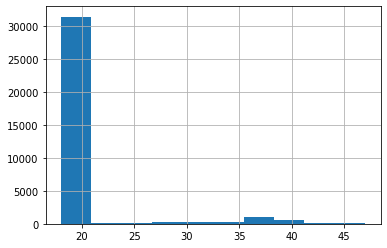

In [104]:
train['Capital-net'].hist()

<AxesSubplot:>

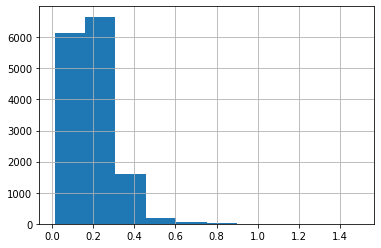

In [105]:
train['fnlwgt'] = train['fnlwgt'].apply(lambda x : x/1e6)
test['fnlwgt'] = test['fnlwgt'].apply(lambda x : x/1e6)
test['fnlwgt'].hist()

In [106]:
train['fnlwgt'].describe()

count    34189.000000
mean         0.189545
std          0.104768
min          0.012285
25%          0.117542
50%          0.178322
75%          0.237525
max          1.484705
Name: fnlwgt, dtype: float64

In [107]:
#Reorganizing Final Weight into multiple catagories to normalize the data
def rewgt(row):
  for i in range(0,4,1):
    if (row['fnlwgt']<(float(i+1)/20) and row['fnlwgt']>=(float(i)/20) ):
      row['fnlwgt']=int(i)
  for i in range(4,12,2):
    if (row['fnlwgt']<(float(i+1)/20) and row['fnlwgt']>=(float(i)/20) ):
      row['fnlwgt']=int((i-4)/2)+4
  for i in range(12,30,4):
    if (row['fnlwgt']<(float(i+1)/20) and row['fnlwgt']>=(float(i)/20) ):
      row['fnlwgt']=int((i-12)/4)+8 
  return row
train = train.apply(rewgt,axis ='columns')
test = test.apply(rewgt,axis ='columns')

<AxesSubplot:xlabel='fnlwgt', ylabel='income'>

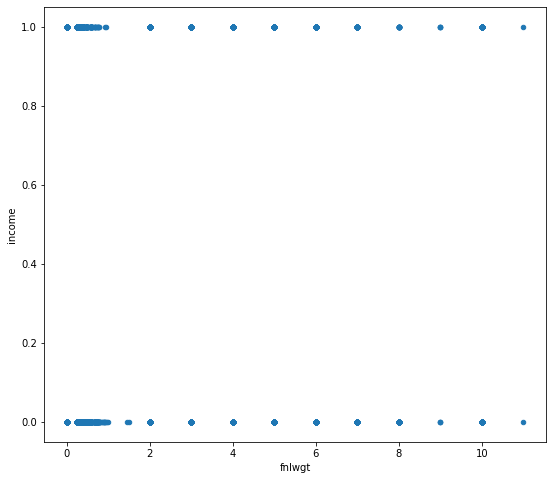

In [108]:
train.plot(x="fnlwgt", y='income' ,kind=  'scatter', figsize=(9, 8))

In [109]:
train.corr()

,id,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,Capital-net
id,1.000000,0.004540,0.000387,-0.000676,0.003327,-0.001438,-0.001498,-0.003956,-0.000496
age,0.004540,1.000000,0.019363,0.044416,0.078719,0.055227,0.134777,0.253070,0.126971
fnlwgt,0.000387,0.019363,1.000000,0.001072,-0.008591,-0.013018,-0.005555,-0.007971,-0.005582
education-num,-0.000676,0.044416,0.001072,1.000000,0.129214,0.079316,0.171357,0.335610,0.156717
capital-gain,0.003327,0.078719,-0.008591,0.129214,1.000000,-0.031481,0.087913,0.224856,0.646470
capital-loss,-0.001438,0.055227,-0.013018,0.079316,-0.031481,1.000000,0.059407,0.141800,-0.061150
hours-per-week,-0.001498,0.134777,-0.005555,0.171357,0.087913,0.059407,1.000000,0.263282,0.109828
income,-0.003956,0.253070,-0.007971,0.335610,0.224856,0.141800,0.263282,1.000000,0.331589
Capital-net,-0.000496,0.126971,-0.005582,0.156717,0.646470,-0.061150,0.109828,0.331589,1.000000


**Data Scaling and Converting catagorical data into dummy/indicator variables**

In [110]:
features=['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex','Capital-net', 'hours-per-week', 'Native']
X_train = pd.get_dummies(train[features])
X_test =  pd.get_dummies(test[features])
y_train = train['income']
y_train.shape

(34189,)

In [111]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
y_train = train.income

# Testing Various Classification Algorithms on train data for accuracy
Upon testing the various classification algorithms, XGBoost suggests maximum efficiency in predictions.

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [113]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.63863703 0.63454226 0.63615092 0.63966072 0.63916923]
0.6376320318580365


In [114]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84688505 0.84205908 0.85083358 0.83854928 0.8478865 ]
0.8452426992249175


In [115]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80769231 0.79833285 0.81412694 0.80447499 0.81409975]
0.8077453670591211


In [116]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8287511  0.81690553 0.83094472 0.81427318 0.82828726]
0.8238323570418394


In [117]:
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85726821 0.84966364 0.8582919  0.8477625  0.85841743]
0.8542807375675505


##FINAL OUTPUT:



Using **Support Vector Classifier** to predict Income 
(Accuracy : 79.934%)

In [118]:
clf = SVC(kernel= 'sigmoid')
clf.fit(X_train, y_train)
target0 = clf.predict(X_test)

In [119]:
#Function to translate income values from binary to required output format 
convert = lambda x : '<=50k' if x==0 else '>50k'

In [120]:
target0 = np.array([convert(x) for x in target0])
output = {'id': test.id , 'income':target0}
submission0 = pd.DataFrame(data=output)
submission0.to_csv('submission0.csv',index=False)

Using **Random Forest Classifier** to predict Income 
(Accuracy : 84.111%)

In [121]:
classify = RandomForestClassifier(n_estimators = 100)  
classify.fit(X_train,y_train)
target1 = classify.predict(X_test)
target1 = np.array([convert(x) for x in target1])

In [122]:
output = {'id': test.id , 'income':target1}
submission1 = pd.DataFrame(data=output)
submission1.to_csv('submission1.csv',index=False)

Using **XGB Classification** to predict income(Acuuracy :85.367%)

In [123]:
xclassify = XGBClassifier()
xclassify.fit(X_train, y_train)
target2 = xclassify.predict(X_test)
target2 = np.array([convert(x) for x in target2])

In [124]:
output = {'id': test.id , 'income':target2}
submission2 = pd.DataFrame(data=output)
submission2.to_csv('submission2.csv',index=False)

In [125]:
from google.colab import files

files.download('submission0.csv')
files.download('submission1.csv')
files.download('submission2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>